In [3]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [4]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer



In [5]:
# Step 2: Load Data from a .txt File
data = pd.read_csv('D:/path/CNS-data.csv', delimiter=',')  # Replace with your actual delimiter
data


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (787,836,853,906,955,972,1147,1148) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SMILES,Class,MW,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CN(C)CCc1ncccc1,1,150.115698,0,-0.0586,0.003434,21.9152,27.375102,6,6,...,0,0,0,0,0,0,0,0,0,0
1,CC(Cc1ccccc1)NN,1,150.115698,0,-0.9526,0.907447,22.7461,27.375102,6,6,...,0,0,0,0,0,0,0,0,0,0
2,CC(Nc(cc1)ccc1O)=O,1,151.063329,0,-1.0852,1.177659,15.4305,22.785137,6,6,...,0,0,0,0,0,0,0,0,0,0
3,CC(Nc1cc(O)ccc1)=O,1,151.063329,0,-1.0852,1.177659,15.4305,22.785137,6,6,...,0,0,0,0,0,0,0,0,0,0
4,CC(Cc1ccccc1)NO,0,151.099714,0,-0.8174,0.668143,20.0266,26.410309,6,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1,0,310.146999,0,-0.0372,0.001384,6.2959,52.922274,23,24,...,0,0,0,0,0,0,0,0,0,0
2623,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,0,265.157898,0,-0.8546,0.730341,30.1084,45.889067,12,12,...,0,0,0,0,0,0,0,0,0,0
2624,c1ccc(NC2=NCCN2)cc1,0,161.095297,0,-0.6705,0.449570,20.4373,26.474723,6,6,...,0,0,0,0,0,0,0,0,0,0
2625,c1ccc2[nH]c(-c3cscn3)nc2c1,0,201.036068,0,-0.0064,0.000041,23.3767,28.467551,11,11,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Step 1: Identify columns with missing values
missing_columns = data.columns[data.isnull().any()]
print("Columns with Missing Values:")
print(missing_columns)

# Step 2: Find rows with missing values
missing_rows = data[data.isnull().any(axis=1)]
print("\nRows with Missing Values:")
display(missing_rows)

# Step 3: Display the count of missing values per column
missing_count_per_column = data.isnull().sum()
print("\nCount of Missing Values Per Column:")
print(missing_count_per_column)


Columns with Missing Values:
Index(['ALogP', 'ALogp2', 'AMR', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s',
       'ATS5s', 'ATS6s',
       ...
       'AVP-1', 'AVP-2', 'AVP-3', 'AVP-4', 'AVP-5', 'AVP-6', 'AVP-7', 'Kier3',
       'VABC', 'XLogP'],
      dtype='object', length=200)

Rows with Missing Values:


,SMILES,Class,MW,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CN(C)CCc1ncccc1,1,150.115698,0,-0.0586,0.003434,21.9152,27.375102,6,6,...,0,0,0,0,0,0,0,0,0,0
4,CC(Cc1ccccc1)NO,0,151.099714,0,-0.8174,0.668143,20.0266,26.410309,6,6,...,0,0,0,0,0,0,0,0,0,0
6,Nc(cc1)cc(O)c1C(O)=O,0,153.042593,1,-1.4500,2.102500,14.0060,20.493551,6,6,...,0,0,0,0,0,0,0,0,0,0
7,NCCc(cc1)cc(O)c1O,0,153.078979,0,-1.4033,1.969251,18.5153,24.118723,6,6,...,0,0,0,0,0,0,0,0,0,0
121,[O-]C(P([O-])([O-])=O)=O.[Na+].[Na+].[Na+],1,122.948335,0,-2.4908,6.204085,11.6661,9.400000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,O=c1[nH]cnc2c1ncn2[C@H]1CC[C@@H](CO)O1,0,235.083115,0,-1.6526,2.731087,35.6864,31.740723,5,5,...,0,0,0,0,0,0,0,0,0,0
2598,O=c1cccc2n1CC1CNCC2C1,0,190.110613,0,-1.3121,1.721606,51.5535,31.697102,0,0,...,0,0,0,0,0,0,0,0,0,0
2599,O=c1cccc2n1C[C@@H]1CNC[C@@H]2C1,0,190.110613,0,-1.3121,1.721606,51.5535,31.697102,0,0,...,0,0,0,0,0,0,0,0,0,0
2600,O=c1oc2ccccc2c(O)c1Cc1c(O)c2ccccc2oc1=O,0,336.063388,0,-0.5766,0.332468,44.5794,46.253516,12,12,...,0,0,0,0,0,0,0,0,0,0



Count of Missing Values Per Column:
SMILES          0
Class           0
MW              0
nAcid           0
ALogP           1
               ..
PubchemFP876    0
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
Length: 2327, dtype: int64


In [7]:
missing_rows.to_csv('External-test-set.csv')

In [8]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Display the cleaned data
print("Data after Removing Rows with Missing Values:")
display(data_cleaned.head())

# Verify no missing values remain
print("\nMissing Values in Cleaned Data:")
print(data_cleaned.isnull().sum())


Data after Removing Rows with Missing Values:


,SMILES,Class,MW,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
1,CC(Cc1ccccc1)NN,1,150.115698,0,-0.9526,0.907447,22.7461,27.375102,6,6,...,0,0,0,0,0,0,0,0,0,0
2,CC(Nc(cc1)ccc1O)=O,1,151.063329,0,-1.0852,1.177659,15.4305,22.785137,6,6,...,0,0,0,0,0,0,0,0,0,0
3,CC(Nc1cc(O)ccc1)=O,1,151.063329,0,-1.0852,1.177659,15.4305,22.785137,6,6,...,0,0,0,0,0,0,0,0,0,0
5,CC(C)(C(CC1)C2)C1(C)C2=O,1,152.120115,0,0.9693,0.939542,43.7625,29.070688,0,0,...,0,0,0,0,0,0,0,0,0,0
8,NCC(c1cccc(O)c1)O,0,153.078979,0,-1.7093,2.921706,17.4614,24.118723,6,6,...,0,0,0,0,0,0,0,0,0,0



Missing Values in Cleaned Data:
SMILES          0
Class           0
MW              0
nAcid           0
ALogP           0
               ..
PubchemFP876    0
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
Length: 2327, dtype: int64


In [9]:
data_cleaned

,SMILES,Class,MW,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
1,CC(Cc1ccccc1)NN,1,150.115698,0,-0.9526,0.907447,22.7461,27.375102,6,6,...,0,0,0,0,0,0,0,0,0,0
2,CC(Nc(cc1)ccc1O)=O,1,151.063329,0,-1.0852,1.177659,15.4305,22.785137,6,6,...,0,0,0,0,0,0,0,0,0,0
3,CC(Nc1cc(O)ccc1)=O,1,151.063329,0,-1.0852,1.177659,15.4305,22.785137,6,6,...,0,0,0,0,0,0,0,0,0,0
5,CC(C)(C(CC1)C2)C1(C)C2=O,1,152.120115,0,0.9693,0.939542,43.7625,29.070688,0,0,...,0,0,0,0,0,0,0,0,0,0
8,NCC(c1cccc(O)c1)O,0,153.078979,0,-1.7093,2.921706,17.4614,24.118723,6,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1,0,310.146999,0,-0.0372,0.001384,6.2959,52.922274,23,24,...,0,0,0,0,0,0,0,0,0,0
2623,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,0,265.157898,0,-0.8546,0.730341,30.1084,45.889067,12,12,...,0,0,0,0,0,0,0,0,0,0
2624,c1ccc(NC2=NCCN2)cc1,0,161.095297,0,-0.6705,0.449570,20.4373,26.474723,6,6,...,0,0,0,0,0,0,0,0,0,0
2625,c1ccc2[nH]c(-c3cscn3)nc2c1,0,201.036068,0,-0.0064,0.000041,23.3767,28.467551,11,11,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Remove columns where all values are zero
data_cleaned = data_cleaned.loc[:, (data_cleaned != 0).any(axis=0)]

print("Data after Removing Columns with All Zero Values:")
display(data_cleaned.head())

# Verify no column contains only zeros
print("\nColumns with Non-Zero Values:")
print(data_cleaned.columns)

Data after Removing Columns with All Zero Values:


,SMILES,Class,MW,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,PubchemFP842,PubchemFP845,PubchemFP847,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP866,PubchemFP868,PubchemFP875
1,CC(Cc1ccccc1)NN,1,150.115698,0,-0.9526,0.907447,22.7461,27.375102,6,6,...,0,0,0,0,0,0,0,0,0,0
2,CC(Nc(cc1)ccc1O)=O,1,151.063329,0,-1.0852,1.177659,15.4305,22.785137,6,6,...,0,0,0,0,0,0,0,0,0,0
3,CC(Nc1cc(O)ccc1)=O,1,151.063329,0,-1.0852,1.177659,15.4305,22.785137,6,6,...,0,0,0,0,0,0,0,0,0,0
5,CC(C)(C(CC1)C2)C1(C)C2=O,1,152.120115,0,0.9693,0.939542,43.7625,29.070688,0,0,...,0,0,0,1,0,0,0,0,0,0
8,NCC(c1cccc(O)c1)O,0,153.078979,0,-1.7093,2.921706,17.4614,24.118723,6,6,...,0,0,0,0,0,0,0,0,0,0



Columns with Non-Zero Values:
Index(['SMILES', 'Class', 'MW', 'nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol',
       'naAromAtom', 'nAromBond',
       ...
       'PubchemFP842', 'PubchemFP845', 'PubchemFP847', 'PubchemFP860',
       'PubchemFP861', 'PubchemFP862', 'PubchemFP863', 'PubchemFP866',
       'PubchemFP868', 'PubchemFP875'],
      dtype='object', length=1849)


In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming `data_cleaned` is your DataFrame
# Exclude "SMILES" and "Class" from scaling
columns_to_keep = ['SMILES', 'Class']

# Apply feature scaling
scaler = StandardScaler()

# Select numeric columns excluding the ones in `columns_to_keep`
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns
columns_to_scale = [col for col in numeric_columns if col not in columns_to_keep]

# Perform scaling on the selected columns
data_cleaned[columns_to_scale] = scaler.fit_transform(data_cleaned[columns_to_scale])

# Print results
print("\nData after Feature Scaling (Standardization):")
print(data_cleaned.head())




<ipython-input-11-e4f738a640b8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[columns_to_scale] = scaler.fit_transform(data_cleaned[columns_to_scale])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)



Data after Feature Scaling (Standardization):
                     SMILES  Class        MW     nAcid     ALogP    ALogp2  \
1           CC(Cc1ccccc1)NN      1 -2.230044 -0.406267 -0.329416 -0.275772   
2        CC(Nc(cc1)ccc1O)=O      1 -2.216907 -0.406267 -0.432386 -0.203430   
3        CC(Nc1cc(O)ccc1)=O      1 -2.216907 -0.406267 -0.432386 -0.203430   
5  CC(C)(C(CC1)C2)C1(C)C2=O      1 -2.202257 -0.406267  1.163024 -0.267179   
8         NCC(c1cccc(O)c1)O      0 -2.188964 -0.406267 -0.917027  0.263489   

        AMR      apol  naAromAtom  nAromBond  ...  PubchemFP842  PubchemFP845  \
1 -1.402066 -1.670720   -0.241209  -0.257602  ...     -0.066346     -0.019964   
2 -1.730763 -2.044539   -0.241209  -0.257602  ...     -0.066346     -0.019964   
3 -1.730763 -2.044539   -0.241209  -0.257602  ...     -0.066346     -0.019964   
5 -0.457777 -1.532627   -1.429114  -1.403006  ...     -0.066346     -0.019964   
8 -1.639513 -1.935928   -0.241209  -0.257602  ...     -0.066346     -0.019964  

In [12]:
data_cleaned

,SMILES,Class,MW,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,PubchemFP842,PubchemFP845,PubchemFP847,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP866,PubchemFP868,PubchemFP875
1,CC(Cc1ccccc1)NN,1,-2.230044,-0.406267,-0.329416,-0.275772,-1.402066,-1.670720,-0.241209,-0.257602,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
2,CC(Nc(cc1)ccc1O)=O,1,-2.216907,-0.406267,-0.432386,-0.203430,-1.730763,-2.044539,-0.241209,-0.257602,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
3,CC(Nc1cc(O)ccc1)=O,1,-2.216907,-0.406267,-0.432386,-0.203430,-1.730763,-2.044539,-0.241209,-0.257602,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
5,CC(C)(C(CC1)C2)C1(C)C2=O,1,-2.202257,-0.406267,1.163024,-0.267179,-0.457777,-1.532627,-1.429114,-1.403006,...,-0.066346,-0.019964,-0.019964,3.292358,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
8,NCC(c1cccc(O)c1)O,0,-2.188964,-0.406267,-0.917027,0.263489,-1.639513,-1.935928,-0.241209,-0.257602,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1,0,-0.011500,-0.406267,0.381433,-0.518345,-2.141191,0.409912,3.124521,3.178610,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
2623,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,0,-0.635193,-0.406267,-0.253315,-0.323187,-1.071270,-0.162892,0.946695,0.887802,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
2624,c1ccc(NC2=NCCN2)cc1,0,-2.077832,-0.406267,-0.110353,-0.398355,-1.505803,-1.744049,-0.241209,-0.257602,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
2625,c1ccc2[nH]c(-c3cscn3)nc2c1,0,-1.524126,-0.406267,0.405350,-0.518704,-1.373732,-1.581748,0.748711,0.696901,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239


In [13]:
data_cleaned.to_csv('data_cleaned_CNS.csv')

In [14]:
df = data_cleaned

In [15]:
# Drop 'Name' and 'Class' columns to create the independent variables (X)
X = df.drop(["SMILES", "Class"], axis=1)

# Define the dependent variable (y) as the 'Class' column
y = df["Class"]

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [16]:
df

,SMILES,Class,MW,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,PubchemFP842,PubchemFP845,PubchemFP847,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP866,PubchemFP868,PubchemFP875
1,CC(Cc1ccccc1)NN,1,-2.230044,-0.406267,-0.329416,-0.275772,-1.402066,-1.670720,-0.241209,-0.257602,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
2,CC(Nc(cc1)ccc1O)=O,1,-2.216907,-0.406267,-0.432386,-0.203430,-1.730763,-2.044539,-0.241209,-0.257602,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
3,CC(Nc1cc(O)ccc1)=O,1,-2.216907,-0.406267,-0.432386,-0.203430,-1.730763,-2.044539,-0.241209,-0.257602,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
5,CC(C)(C(CC1)C2)C1(C)C2=O,1,-2.202257,-0.406267,1.163024,-0.267179,-0.457777,-1.532627,-1.429114,-1.403006,...,-0.066346,-0.019964,-0.019964,3.292358,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
8,NCC(c1cccc(O)c1)O,0,-2.188964,-0.406267,-0.917027,0.263489,-1.639513,-1.935928,-0.241209,-0.257602,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1,0,-0.011500,-0.406267,0.381433,-0.518345,-2.141191,0.409912,3.124521,3.178610,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
2623,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,0,-0.635193,-0.406267,-0.253315,-0.323187,-1.071270,-0.162892,0.946695,0.887802,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
2624,c1ccc(NC2=NCCN2)cc1,0,-2.077832,-0.406267,-0.110353,-0.398355,-1.505803,-1.744049,-0.241209,-0.257602,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239
2625,c1ccc2[nH]c(-c3cscn3)nc2c1,0,-1.524126,-0.406267,0.405350,-0.518704,-1.373732,-1.581748,0.748711,0.696901,...,-0.066346,-0.019964,-0.019964,-0.303734,-0.243965,-0.019964,-0.06931,-0.077537,-0.028239,-0.028239


In [17]:
lda = LinearDiscriminantAnalysis()
base_model = RandomForestClassifier(random_state=42)

In [18]:
# Feature selection with RFE to get the top 8 features
selector = RFE(base_model, n_features_to_select=8, step=1)
selector = selector.fit(X_train, y_train)

In [19]:
# Get the top 8 features
selected_features = X.columns[selector.support_]
print("Top 8 features selected:", selected_features)

Top 8 features selected: Index(['SpMAD_Dzs', 'SpMAD_Dt', 'SHBd', 'minHBa', 'minwHBa', 'minHsOH',
       'maxsssN', 'TopoPSA'],
      dtype='object')


In [20]:
# Train the LDA model using only the top 8 features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

lda.fit(X_train_selected, y_train)

LinearDiscriminantAnalysis()

In [21]:
# Display the coefficients of the LDA model for each of the top 8 features
print("\nCoefficients of the LDA model for the top 8 features:")
coefficients = pd.DataFrame(lda.coef_, columns=selected_features)
print(coefficients)


Coefficients of the LDA model for the top 8 features:
   SpMAD_Dzs  SpMAD_Dt      SHBd    minHBa  minwHBa   minHsOH  maxsssN  \
0  -0.437774  0.470987  0.214074 -0.133072 -0.18943 -0.937686  0.41202   

    TopoPSA  
0 -1.042523  


In [22]:
# Make predictions
y_pred_train = lda.predict(X_train_selected)
y_pred_test = lda.predict(X_test_selected)

In [23]:
# Evaluate the model on the test set
print("\nTrain Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_pred_test))


Train Accuracy: 0.7719123505976095
Test Accuracy: 0.7729083665338645

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       241
           1       0.80      0.76      0.78       261

    accuracy                           0.77       502
   macro avg       0.77      0.77      0.77       502
weighted avg       0.77      0.77      0.77       502



In [24]:
# Confusion matrix for test data
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix  # model stats
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix (Test Data):\n", conf_matrix_test)

# Calculate TP, TN, FP, FN for test set
TN_test, FP_test, FN_test, TP_test = conf_matrix_test.ravel()
print(f"\nTest Set - TP: {TP_test}, TN: {TN_test}, FP: {FP_test}, FN: {FN_test}")

# Confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("\nConfusion Matrix (Training Data):\n", conf_matrix_train)

# Calculate TP, TN, FP, FN for training set
TN_train, FP_train, FN_train, TP_train = conf_matrix_train.ravel()
print(f"\nTraining Set - TP: {TP_train}, TN: {TN_train}, FP: {FP_train}, FN: {FN_train}")


Confusion Matrix (Test Data):
 [[190  51]
 [ 63 198]]

Test Set - TP: 198, TN: 190, FP: 51, FN: 63

Confusion Matrix (Training Data):
 [[733 254]
 [204 817]]

Training Set - TP: 817, TN: 733, FP: 254, FN: 204


In [25]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming y_pred_test and y_pred_train are already defined
# y_pred_test = model.predict(X_test_selected)
# y_pred_train = model.predict(X_train_selected)

# Confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
TN_test, FP_test, FN_test, TP_test = conf_matrix_test.ravel()

# Confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
TN_train, FP_train, FN_train, TP_train = conf_matrix_train.ravel()

# Create a DataFrame to display the results in a tabular format
results = pd.DataFrame({
    'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
    'Test Set': [TP_test, TN_test, FP_test, FN_test],
    'Training Set': [TP_train, TN_train, FP_train, FN_train]
})

# Display the results
print("\nConfusion Matrix Results:\n")
print(results)


Confusion Matrix Results:

                 Metric  Test Set  Training Set
0   True Positives (TP)       198           817
1   True Negatives (TN)       190           733
2  False Positives (FP)        51           254
3  False Negatives (FN)        63           204


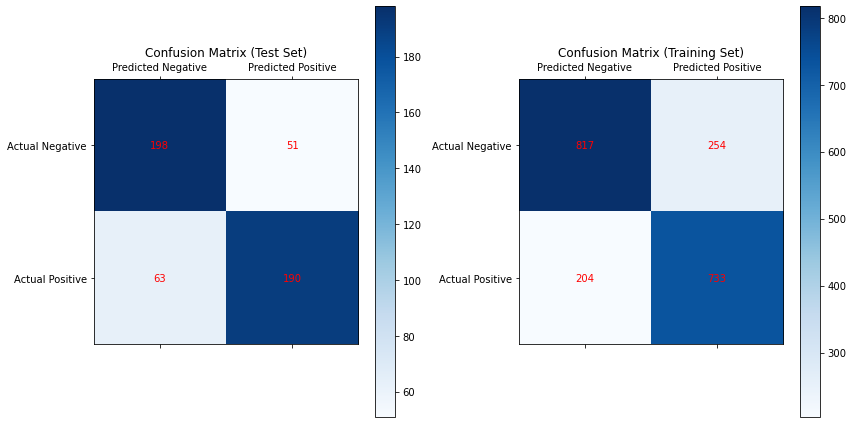

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Provided confusion matrix metrics
confusion_metrics = {
    'Metric': ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)'],
    'Test Set': [198, 190, 51, 63],
    'Training Set': [817, 733, 254, 204]
}

# Create a DataFrame to visualize the metrics more clearly
import pandas as pd
df_metrics = pd.DataFrame(confusion_metrics)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the Test Set
test_values = df_metrics['Test Set'].values
test_labels = df_metrics['Metric'].values
test_matrix = np.array([[test_values[0], test_values[2]], [test_values[3], test_values[1]]])

cax1 = ax[0].matshow(test_matrix, cmap='Blues')
fig.colorbar(cax1, ax=ax[0])
ax[0].set_title('Confusion Matrix (Test Set)')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Predicted Negative', 'Predicted Positive'])
ax[0].set_yticks([0, 1])
ax[0].set_yticklabels(['Actual Negative', 'Actual Positive'])
for i in range(2):
    for j in range(2):
        ax[0].text(j, i, str(test_matrix[i, j]), ha='center', va='center', color='Red')

# Plot for the Training Set
train_values = df_metrics['Training Set'].values
train_labels = df_metrics['Metric'].values
train_matrix = np.array([[train_values[0], train_values[2]], [train_values[3], train_values[1]]])

cax2 = ax[1].matshow(train_matrix, cmap='Blues')
fig.colorbar(cax2, ax=ax[1])
ax[1].set_title('Confusion Matrix (Training Set)')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Predicted Negative', 'Predicted Positive'])
ax[1].set_yticks([0, 1])
ax[1].set_yticklabels(['Actual Negative', 'Actual Positive'])
for i in range(2):
    for j in range(2):
        ax[1].text(j, i, str(train_matrix[i, j]), ha='center', va='center', color='Red')

# Display the plots
plt.tight_layout()
plt.show()


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

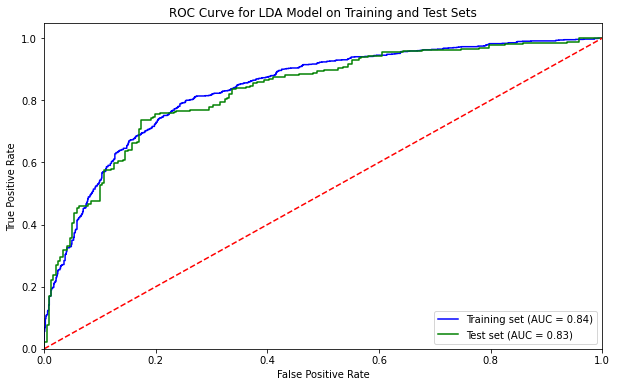

In [28]:
# Get predicted probabilities for training and test sets
y_train_prob = lda.predict_proba(X_train_selected)[:, 1]  # Probability for positive class
y_test_prob = lda.predict_proba(X_test_selected)[:, 1]

# Calculate ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f"Training set (AUC = {roc_auc_train:.2f})")
plt.plot(fpr_test, tpr_test, color='green', label=f"Test set (AUC = {roc_auc_test:.2f})")



plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for LDA Model on Training and Test Sets")
plt.legend(loc="lower right")
plt.show()

In [29]:
# Retrieve the coefficients (weights) and intercepts for each class
weights = lda.coef_      # Coefficients for the features
intercepts = lda.intercept_  # Intercepts for each class

# Display the discriminant function for each class
for idx, (w, c) in enumerate(zip(weights, intercepts)):
    equation = " + ".join([f"{coef:.4f}*{name}" for coef, name in zip(w, selected_features)])
    equation = f"d_{idx}(x) = {equation} + {c:.4f}"
    print(f"Discriminant function for class {idx}: {equation}")


Discriminant function for class 0: d_0(x) = -0.4378*SpMAD_Dzs + 0.4710*SpMAD_Dt + 0.2141*SHBd + -0.1331*minHBa + -0.1894*minwHBa + -0.9377*minHsOH + 0.4120*maxsssN + -1.0425*TopoPSA + 0.3189


In [30]:
import numpy as np
import pandas as pd

# Assuming `weights` is the coefficients (lda.coef_) from the LDA model
# and `selected_features` is the list of feature names
weights = lda.coef_
selected_features = ['SpMAD_Dzs', 'SpMAD_Dt', 'SHBd', 'minHBa', 'minwHBa', 'minHsOH', 'maxsssN', 'TopoPSA']

# Calculate the VIP scores
# Calculate squared weights
squared_weights = weights**2

# Sum squared weights for all classes for each feature
sum_squared_weights = squared_weights.sum(axis=0)

# Normalize by the sum of squared weights
normalized_squared_weights = sum_squared_weights / sum_squared_weights.sum()

# Calculate the VIP scores (sqrt of normalized squared weights scaled by the number of features)
vip_scores = np.sqrt(len(selected_features) * normalized_squared_weights)

# Create a DataFrame to display the scores
vip_df = pd.DataFrame({'Feature': selected_features, 'VIP Score': vip_scores})

# Sort by VIP Score
vip_df = vip_df.sort_values(by='VIP Score', ascending=False)

# Display the VIP scores
print(vip_df)


     Feature  VIP Score
7    TopoPSA   1.811795
5    minHsOH   1.629600
1   SpMAD_Dt   0.818526
0  SpMAD_Dzs   0.760804
6    maxsssN   0.716046
2       SHBd   0.372038
4    minwHBa   0.329210
3     minHBa   0.231265


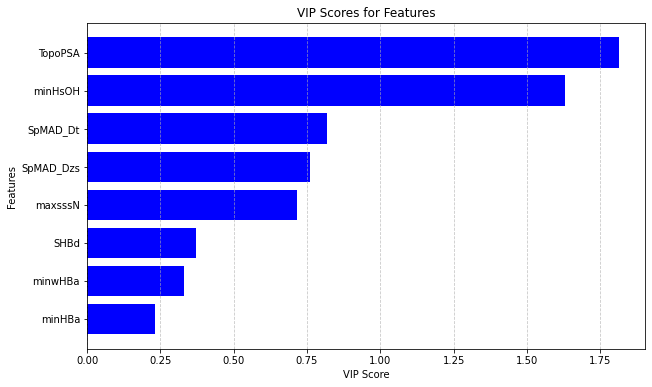

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
# Sort the DataFrame by VIP Score in descending order
vip_df = vip_df.sort_values(by='VIP Score', ascending=False)

# Plotting the VIP scores
plt.figure(figsize=(10, 6))
plt.barh(vip_df['Feature'], vip_df['VIP Score'], color='blue')
plt.xlabel("VIP Score")
plt.ylabel("Features")
plt.title("VIP Scores for Features")
plt.gca().invert_yaxis()  # Invert y-axis for highest VIP on top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Optional: Add gridlines for better readability
plt.show()

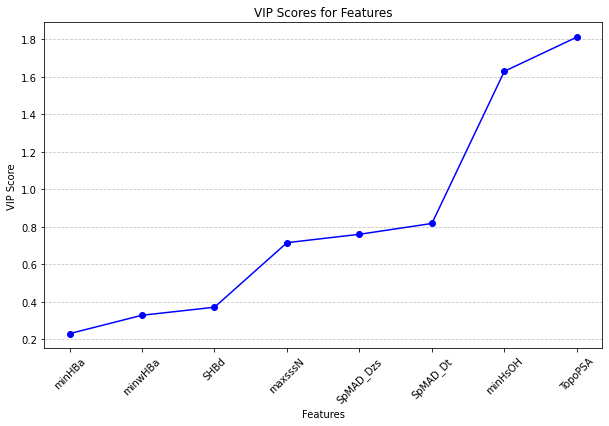

In [37]:
vip_df = vip_df.sort_values(by='VIP Score', ascending=True)  # Sort in ascending order for line plot

# Plotting the VIP scores as a line plot
plt.figure(figsize=(10, 6))
plt.plot(vip_df['Feature'], vip_df['VIP Score'], marker='o', linestyle='-', color='blue')
plt.title("VIP Scores for Features")
plt.xlabel("Features")
plt.ylabel("VIP Score")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for better readability
plt.show()